In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

In [2]:
train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle=False)

In [4]:
len(trainset)

6000

In [5]:
len(testset)

1000

In [6]:
class Net(nn.Module): #inherit from nn.module
    def __init__(self): 
        #initialize nn.module
        super().__init__()
        #define fully connected layers to nn
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) #we have 10 classes
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) #we dont want to pass relu here. because this is o/p layer.
        return F.log_softmax(x, dim=1) #dim=1 is similar to axes, which this is the probability distribution we want to sum to 1.
        return x
    
net = Net()
net

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


nn.Linear(input, output) ==> in this case, i/p is our 28*28 image. and for o/p our target is to make a 3 layers of 64 neurons for hidden layers. For every fcl were going to have i/p that is connected to this layer, and o/p is anything we want.
F.relu is activation function(Rectified Linear) 

In [7]:
X = torch.rand((28,28))
X = X.view(-1,28*28) #-1 specifies that i/p will be of unknown shape

In [8]:

output = net(X)
output

tensor([[-2.3689, -2.2244, -2.3345, -2.2659, -2.2724, -2.2455, -2.3849, -2.3303,
         -2.2221, -2.3969]], grad_fn=<LogSoftmaxBackward>)

These are the Actual predictions. W have to initialize weights and biases randomly. Here we passed data into the NN. grad_fn is gradient function. and when we pass info through it calculates how far are we.

# Loss and Optimizer

loss is a measure of how wrong is the model. Our goal is low loss.
Optimizer adjust weights based on loss, gradients in such a way to lower the loss.


In [9]:
import torch.optim as optim

In [14]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of featuresets and labels
        X, y = data
        #print(X[0])
        #print(y[0])
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step() #adjust weights
    print(loss)
        
        
        
        
        

tensor(0.0533, grad_fn=<NllLossBackward>)
tensor(0.0106, grad_fn=<NllLossBackward>)
tensor(0.4572, grad_fn=<NllLossBackward>)


In [17]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct += 1
            total += 1
print('Accuracy=', round(correct/total, 3))

Accuracy= 0.979


In [18]:
import matplotlib.pyplot as plt

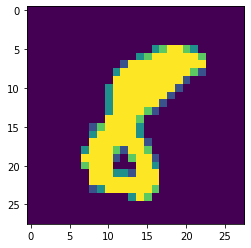

In [19]:
plt.imshow(X[0].view(28,28))
plt.show()

In [20]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(8, grad_fn=<NotImplemented>)


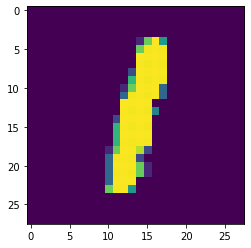

tensor(1, grad_fn=<NotImplemented>)


In [21]:
plt.imshow(X[2].view(28,28))
plt.show()
print(torch.argmax(net(X[2].view(-1,784))[0]))

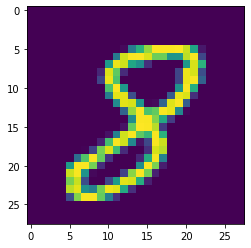

tensor(8, grad_fn=<NotImplemented>)


In [22]:
plt.imshow(X[1].view(28,28))
plt.show()
print(torch.argmax(net(X[1].view(-1,784))[0]))

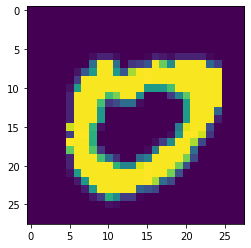

tensor(0, grad_fn=<NotImplemented>)


In [23]:
plt.imshow(X[5].view(28,28))
plt.show()
print(torch.argmax(net(X[5].view(-1,784))[0]))

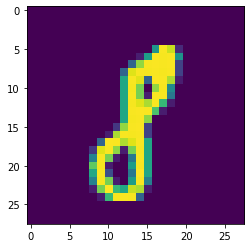

tensor(8, grad_fn=<NotImplemented>)


In [24]:
plt.imshow(X[8].view(28,28))
plt.show()
print(torch.argmax(net(X[8].view(-1,784))[0]))